In [7]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [9]:
def load_vector(path, dim=50):
    vec = {}
    lines = open(path, 'r', encoding='utf-8').readlines()
    for line in lines:
        sp = line.split()
        vec[sp[0]] = np.array(sp[1:], dtype=float)
    return vec

def get_weights(vector, word_index):
    weights = np.zeros((len(word_index)+1, len(list(vector.values())[0])))
    for word, idx in word_index.items():
        if word in vector:
            weights[idx] = vector[word]
    return weights
    

glove = "/Users/vaisakh/programs/Notebooks.old/dataset/glove.6B.50d.txt"
vocab = imdb.get_word_index()

vector = load_vector(glove)
weights = get_weights(vector, vocab)

In [10]:
max_len = 100

x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [11]:
model = Sequential()
model.add(Embedding(input_dim=len(vocab)+1, output_dim=50, input_length=max_len, weights=[weights], trainable=True))
model.add(LSTM(units=20, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(units=10, return_sequences=False))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-10 04:06:32.427449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-10 04:06:32.428042: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           4429250   
                                                                 
 lstm (LSTM)                 (None, 100, 20)           5680      
                                                                 
 dropout (Dropout)           (None, 100, 20)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                1240      
                                                                 
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_split=.2).history

Epoch 1/5


2023-01-10 04:06:32.974599: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-10 04:06:33.822171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:06:34.082422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:06:34.322175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:06:34.670601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:06:35.074817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - ETA: 0s - loss: 0.6456 - accuracy: 0.6050

2023-01-10 04:06:52.165653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:06:52.259975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:06:52.441203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 21s 95ms/step - loss: 0.6456 - accuracy: 0.6050 - val_loss: 0.5193 - val_accuracy: 0.7440
Epoch 2/5
200/200 [==============================] - 18s 88ms/step - loss: 0.4190 - accuracy: 0.8157 - val_loss: 0.4227 - val_accuracy: 0.8034
Epoch 3/5
200/200 [==============================] - 17s 85ms/step - loss: 0.2718 - accuracy: 0.8967 - val_loss: 0.4203 - val_accuracy: 0.8248
Epoch 4/5
200/200 [==============================] - 17s 85ms/step - loss: 0.1637 - accuracy: 0.9453 - val_loss: 0.5198 - val_accuracy: 0.8106
Epoch 5/5
200/200 [==============================] - 17s 83ms/step - loss: 0.0934 - accuracy: 0.9714 - val_loss: 0.5517 - val_accuracy: 0.8198


In [15]:
err, acc = model.evaluate(x_test, y_test)
acc

2023-01-10 04:08:02.945344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:08:03.050289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 04:08:03.232314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 28s 35ms/step - loss: 0.5922 - accuracy: 0.8074


0.807360053062439

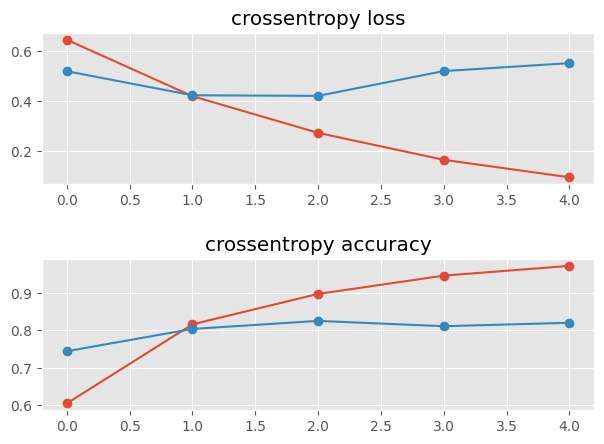

In [16]:
plt.style.use("ggplot")

plt.subplot(2,1,1)
plt.title("crossentropy loss")
plt.plot(history['loss'], marker='o')
plt.plot(history['val_loss'], marker='o')
plt.tight_layout(pad=2)

plt.subplot(2,1,2)
plt.title("crossentropy accuracy")
plt.plot(history['accuracy'], marker='o')
plt.plot(history['val_accuracy'], marker='o')
plt.tight_layout(pad=2)